In [2]:
# try polyharmonic basis functions for thin-plate RBF

In [41]:
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt

In [40]:
def build_stencil_matrix(stencil, kernel=lambda _:_):
    Npoints, Ndim = stencil.shape
    
    ds = sd.squareform(sd.pdist(stencil))
    
    mat = np.zeros(((Npoints + 1 + Ndim), (Npoints + 1 + Ndim)))
    mat[:Npoints, :Npoints] = kernel(ds)
    mat[Npoints, :Npoints] = 1
    mat[:Npoints, Npoints] = 1
    mat[Npoints+1:, :Npoints] = stencil.T
    mat[:Npoints, Npoints+1:] = stencil
    
    return np.linalg.inv(mat)
build_stencil_matrix(stencil, lambda _: _**3)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -2.00000000e+01,  2.00000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.00000000e+01,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -2.00000000e+01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.50000000e-03,  2.50000000e-03],
       [-2.00000000e+01,  2.00000000e+01,  0.00000000e+00,
        -2.50000000e-03,  1.00000000e-01,  4.14213562e-02],
       [ 2.00000000e+01, -0.00000000e+00, -2.00000000e+01,
         2.50000000e-03,  4.14213562e-02,  1.00000000e-01]])

In [38]:
h = 0.05
stencil = np.array(([0, 0], [0, h],[0, -h], [-h, 0], [h, 0]))
stencil = np.array(([0, 0], [h, 0],[0, -h]))
stencil

array([[ 0.  ,  0.  ],
       [ 0.05,  0.  ],
       [ 0.  , -0.05]])

array([ 1.11637992e-17,  2.87364728e-17, -3.99002720e-17, -1.00000000e-02,
       -1.00000000e-01, -1.00000000e-01])

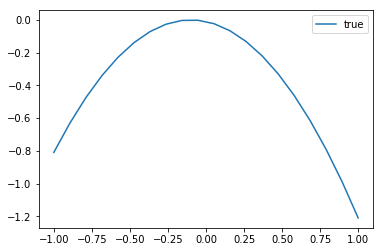

In [44]:
def test_with_sample_function(stencil):
    function = lambda x, y: -((x+0.1)*(y+0.1))
    xss = np.linspace(-1, 1, 20)
    xs, ys = stencil[:, 0], stencil[:, 1]
    fval = function(xs, ys)
    plt.plot(xss, function(xss, xss), label='true')
    Ainv = build_stencil_matrix(stencil)
    b = np.zeros(Ainv.shape[0])
    b[:len(fval)] = fval
    res = Ainv.dot(b)
    w1, w2, w3, v1, v2, v3 = res
    plt.legend()
    return res
test_with_sample_function(stencil)